<a href="https://colab.research.google.com/github/fmassini/DataScienceCoderhouse/blob/main/Anteriores/ProyectoDS_ParteIII_Massini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contexto y problema comercial

La empresa Bosch es conocida por fabricar productos diversos para todo el mundo. Recientemente comenzó a producir un nuevo producto, el cual cuenta con 5 versiones distintas.

Este producto tiene la característica de producirse de una manera diferente a lo que la empresa está acostumbrada, por ello se han desarrollado nuevos procedimientos para llevar adelante la producción.

Estos procedimientos al ser nuevos, lamentablemente distan bastante del ideal; hace falta mucho estudio y trabajo para volverlos más eficientes.

De ahí nace la necesidad de este estudio, con la información que nos proporciona el desarrollador del producto, el sector logístico deberá buscar la manera de optimizar sus procesos, para poder cumplir con los plazos de abastecimiento a planta.

De ninguna manera puede suceder que la línea productiva pare por falta de piezas a la hora de montar, logística debe hacer lo indispensable para evitar este panorama. Y a su vez, hacerlo de la manera más eficiente posible (en cuanto a tiempos y costos).

## Contexto analítico y objetivo

El siguiente dataset contiene información sobre las piezas con su respectivo código (referencia) necesarias para construir distintas versiones de un producto en específico. Estas versiones difieren ya que algunas son más completas que otras, o tienen diferentes funciones, y por ende llevan distintas piezas en su ensamblado.

La mercadería viene en cajones llamados "bases" dentro de contenedores. A su vez, cada caja dentro de estas bases tiene dentro un número determinado de piezas (indicado en el dataset). En resumen, las piezas vienen en cajas, las cuales vienen en bases, las cuales a su vez vienen en contenedores. Toda esta información está detallada en el dataset, donde se indica incluso dimensiones, pesos y tipo de packaging de las bases o cajas.

Cada fila además aclara a que versión del producto pertenece la pieza, hay piezas comunes a todos y otras que no lo son. Una vez traidos los contenedores, las piezas deberán separarse en clases. La clase de una pieza determina de qué forma se ensambla, por lo que es necesario clasificar todo antes de comenzar a ensamblar el producto.

Algunos puntos interesantes a ver en este estudio:

1. Existe un patrón en el contenido de los contenedores y bases? Este patrón se repite versión a versión?
2. Es necesario ingresar toda la mercadería para comenzar a producir? O es posible contar con todas las piezas sin haber ingresado toda la mercadería? Es decir, existe una combinación de contenedores menor al total, que me permite tener todos los tipos de piezas?
3. Qué volumen de ocupación conlleva el almacenar las piezas? A cuantas posiciones en una estantería equivaldría? Qué clase es la más voluminosa? Esto varía versión a versión?
4. Cuáles son las piezas críticas en cuanto a peso? Y en cuanto a volumen?
5. Se podría anticipar en qué packaging vendrán las piezas?

Todos estos puntos indudablemente ayudan a optimizar el proceso de ingreso de la mercadería, tanto para lo que es inspección como para almacenamiento y traslado. Es crítico que todas las piezas se encuentren en el lugar correcto a la hora de producir, y lo que buscamos es volver más eficiente el camino a dicho objetivo.

Fuente: https://docs.google.com/spreadsheets/d/1azdrQsFjjf_YaMbhLYAZjTZPEhPa-n3E/edit?usp=sharing&ouid=111044325679429769254&rtpof=true&sd=true

In [ ]:
!git clone https://github.com/tctianchi/pyvenn.git
%cd pyvenn
!pip install venn
import venn #Importo librería especializada para generar diagramas de Venn de más de 3 sets (límite de Matplotlib)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### A continuación un resumen de las variables del DS:

In [ ]:
DSNX_IND=pd.read_excel('DS producto.xlsx',sheet_name='Hoja2')
DSNX_IND.head(17)

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
0,CLASE,Sector en el cual se ensambla esta pieza,F1,A
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
2,CONTENEDOR,Contenedor en el cual viene esta pieza,CMAU4908460,MRSU3285393
3,BASE,Base en la cual viene esta pieza,AF0001,MP001
4,TIPO BASE,Tipo de base,IRON FRAME,IRON FRAME
5,LARGO BASE,Largo de la base en mm,2110,2250
6,ANCHO BASE,Ancho de la base en mm,600,1700
7,ALTURA BASE,Altura de la base en mm,1200,1050
8,PESO BASE,Peso de la base en kg,205,861.0
9,CAJA,Caja en la cual viene esta pieza,AF0001,MC0072


In [ ]:
DSNX=pd.read_excel('DS producto.xlsx',sheet_name='Hoja1') #Cargo DS

In [ ]:
DSNX['CAJAS/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['BASE'].transform('count') #Genero la columna CAJAS/BASE

In [ ]:
DSNX['REFS/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['REFERENCIA'].transform('nunique') #Genero la columna REFS(distintas)/BASE

In [ ]:
DSNX['CLASES/BASE'] = DSNX.groupby(['BASE', 'VERSION'])['CLASE'].transform('nunique') #Genero la columna CLASES/BASE

Como se explicaba en la introducción, para comenzar a producir es necesario clasificar las piezas en clases. Para esto se debe inspeccionar la mercadería que ingresa, aunque no es necesario hacerlo para todas las bases.

Si las referencias que vienen en la base, pertenecen a distintas clases, se deberá inspeccionar y clasificar, de lo contrario no hará falta, y la base se abatecerá directamente a la clase correspondiente.

In [ ]:
DSNX['INSPECCIÓN'] = np.where(DSNX['CLASES/BASE']>1, 1, 0) #Si la base tiene referencias pertenecientes a más de una clase, la inspecciono

In [ ]:
DSNX['REFS/CAJA'] = DSNX.groupby(['CAJA', 'VERSION'])['REFERENCIA'].transform('nunique') #Genero la columna REFS(distintas)/CAJA

In [ ]:
DSNX['VOLUMEN CAJA'] = ((DSNX['LARGO CAJA']/1000) * (DSNX['ANCHO CAJA']/1000) * (DSNX['ALTURA CAJA']/1000))/DSNX['REFS/CAJA'] #Genero la columna que indique cuanto volumen ocupa la referencia de la fila en cuestión. Si la caja trae múltiples referencias, divido entre esa cantidad

In [ ]:
DSNX['VOL TOTAL'] = DSNX.groupby(['VERSION','INSPECCIÓN','REFERENCIA'])['VOLUMEN CAJA'].transform('sum') #La idea aquí es calcular cuanto volumen en total ocuparía cada referencia, por versión. Separamos según si la base es inspeccionable o no, ya que la pieza recorre un camino distinto en cada caso

### Aquí se presenta un diagrama final resumiendo toda la operativa:

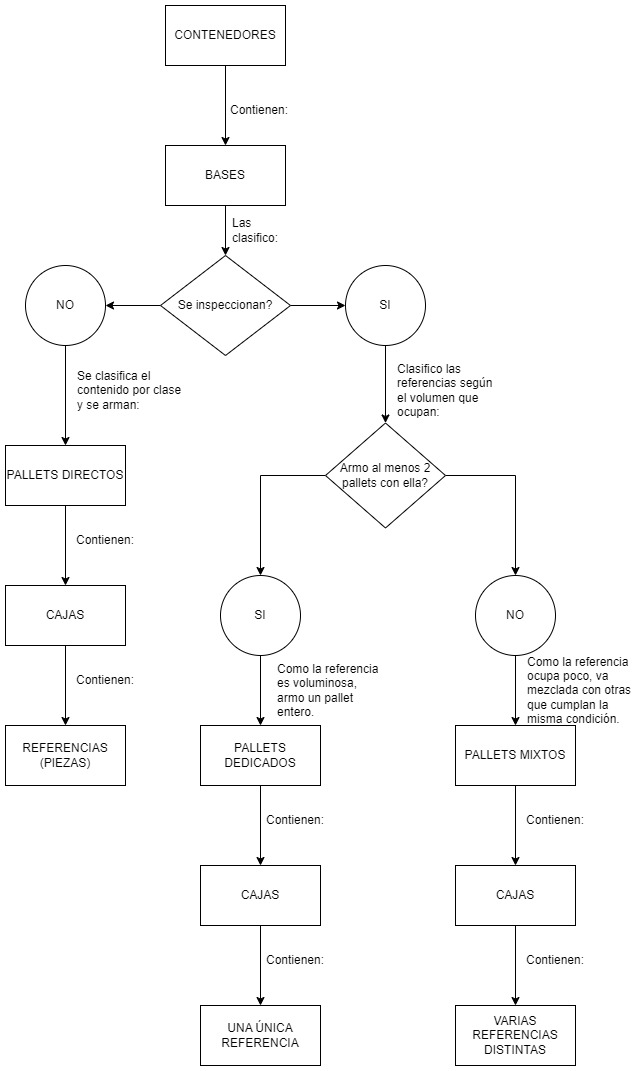

In [ ]:
imagen = Image.open('Flujo.jpg')
display(imagen)

## Exploratory data analysis (Parte 1)

Ahora que conocemos el volumen que ocupa cada referencia, podemos calcular a cuantos pallets equivaldría dentro de una clase.

Recordemos que tenemos 2 tipos de bases, las inspeccionables y las que no.
Las inspeccionables se deberán revisar y armar pallets con la mercadería que contienen.

Lo más fácil para abastecer, es llevar pallets que contengan una sola referencia, ya que los que poseen muchas tienen el problema de que el operario debe "revolver" el pallet para encontrar una referencia en específico.
Por ello, lo ideal sería que cada pallet contenga cajas de una única referencia. El problema está en que no siempre el volumen justifica hacer esto, por ello algunas referencias podrán ir en pallets monoproducto (dedicados) y otras deberán ir en multiproducto (mixtos).

Tomaremos como criterio que armaremos pallets dedicados (una sola ref.) solamente de aquellas referencias que junten en volumen más de 2 pallets completos. El resto irá en pallets mixtos.

En cuanto a las bases no inspeccionables, se abastecen directamente, por ello les llamaremos "DIRECTOS".

A continuación, realizamos estos cálculos y obtenemos el DS final para trabajar.

In [ ]:
VOL_PALLET = 1.2*1.0*1.4 #Volumen que ocupa un pallet completo
DSNX['TIPO PALLET'] = np.where(DSNX['VOL TOTAL']>(2*VOL_PALLET), 'DEDICADO', 'MIXTO') #Si, por versión, una referencia junta más de 2 pallets en una clase, voy a armar pallets monoproducto (dedicados) de esa referencia, de lo contrario irá en pallets mezclados (mixtos)
DSNX['TIPO PALLET'] = np.where(DSNX['INSPECCIÓN']==0, 'DIRECTO', DSNX['TIPO PALLET']) #Esto anterior aplica solo a lo inspeccionable, lo otro se considera "directo"
#DSNX.to_excel('EXTRAIDO.xlsx', index=False)
DSNX

,CLASE,VERSION,CONTENEDOR,BASE,TIPO BASE,LARGO BASE,ANCHO BASE,ALTURA BASE,PESO BASE,CAJA,...,REFERENCIA,UNID/CAJA,CAJAS/BASE,REFS/BASE,CLASES/BASE,INSPECCIÓN,REFS/CAJA,VOLUMEN CAJA,VOL TOTAL,TIPO PALLET
0,F1,M42,CMAU4908460,AF0001,IRON FRAME,2110,600,1200,205.0,AF0001,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
1,F1,M42,CMAU4908460,AF0002,IRON FRAME,2110,600,1200,205.0,AF0002,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
2,F1,M42,CMAU4908460,AF0003,IRON FRAME,2110,600,1200,205.0,AF0003,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
3,F1,M42,CMAU4908460,AF0004,IRON FRAME,2110,600,1200,205.0,AF0004,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
4,F1,M42,CMAU4908460,AF0005,IRON FRAME,2110,600,1200,205.0,AF0005,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23096,G,A42,TEMU8886138,HF030,IRON FRAME,2110,600,1200,286.0,HC0012,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
23097,G,A42,TEMU8886138,HF030,IRON FRAME,2110,600,1200,286.0,HC0013,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
23098,G,A42,TEMU8886138,HF030,IRON FRAME,2110,600,1200,286.0,HC0014,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
23099,G,A42,TEMU8886138,HF030,IRON FRAME,2110,600,1200,286.0,HC0015,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO


### Graficamos cuantas referencias distintas pertenecen a cada clase, promediando por versión.

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_1 = DSNX.groupby(['CLASE', 'VERSION'])['REFERENCIA'].nunique().unstack() #Quiero saber cuantas referencias distintas hay en cada clase, por versión
DSNX_1['PROMEDIO'] =  DSNX_1.mean(axis=1, skipna=True) #Calculo el promedio por versión
DSNX_1

VERSION,A41,A42,M21,M41,M42,PROMEDIO
CLASE,,,,,,
A,10,10,10,10,10,10.0
CA1,25,33,25,25,33,28.2
CA2,33,33,37,39,39,36.2
CA3,39,37,39,39,37,38.2
CA4,44,45,44,44,45,44.4
CA5,16,16,16,16,16,16.0
CA6,29,31,29,29,31,29.8
CA7,20,22,20,20,22,20.8
CH1,15,15,14,15,15,14.8


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='CLASE') | (DSNX_IND['COLUMNA']=='VERSION')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
0,CLASE,Sector en el cual se ensambla esta pieza,F1,A
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
15,REFERENCIA,Código de esta pieza,2804110-BU01,6900006P201D


Text(0.5, 1.0, 'REFERENCIAS DISTINTAS INVOLUCRADAS POR CLASE (PROMEDIO POR VERSIÓN)')

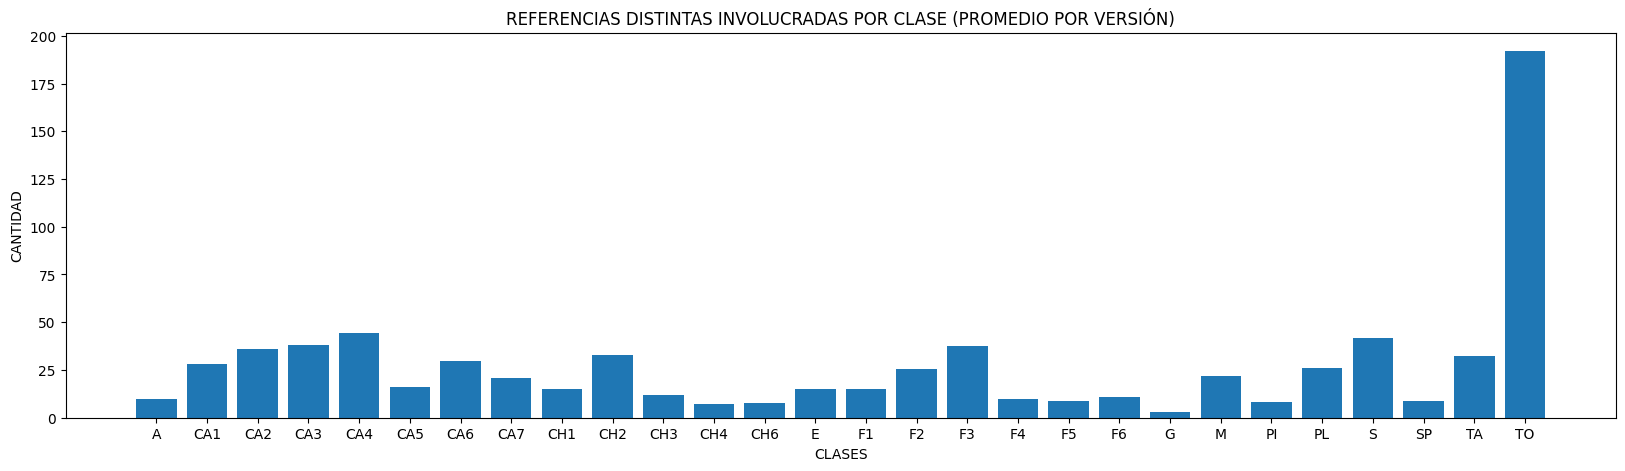

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(DSNX_1.index,DSNX_1['PROMEDIO'])
ax.set_xlabel('CLASES')
ax.set_ylabel('CANTIDAD')
ax.set_title('REFERENCIAS DISTINTAS INVOLUCRADAS POR CLASE (PROMEDIO POR VERSIÓN)')

Podemos concluir dos cosas:

La primera, es que en general todas las clases contienen más o menos la misma cantidad de referencias distintas. Solo la clase "TO" sobresale.

Esto tiene sentido, ya que las referencias pertenecientes a dicha clase son tornillería, de las cuales hay mucha variedad.

### Graficamos cuantas cajas vienen de cada referencia, diferenciando por versión.

A continuación el análisis, un pequeño glosario y un par de gráficos (con y sin outliers).

In [ ]:
DSNX_2 = DSNX.groupby(['REFERENCIA', 'VERSION'])['CAJA'].nunique().unstack() #Quiero saber cuantas cajas vienen por referencia, por versión. Para ello necesito los códigos únicos de cada referencia, y contar cuantas cajas hay involucradas de cada una
DSNX_2 = DSNX_2.fillna(0)
DSNX_2

VERSION,A41,A42,M21,M41,M42
REFERENCIA,,,,,
09103-06002,1.0,1.0,1.0,1.0,1.0
09103-06005,1.0,1.0,1.0,1.0,1.0
09103-06006,1.0,1.0,1.0,1.0,1.0
09103-06006-S111,1.0,1.0,1.0,1.0,1.0
09103-06007,2.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...
GB/T3900-97,1.0,1.0,1.0,1.0,1.0
Q2734816F31,1.0,1.0,1.0,1.0,1.0
Q4400412,1.0,1.0,1.0,1.0,1.0


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='CAJA') | (DSNX_IND['COLUMNA']=='VERSION')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
9,CAJA,Caja en la cual viene esta pieza,AF0001,MC0072
15,REFERENCIA,Código de esta pieza,2804110-BU01,6900006P201D


Text(0.5, 1.0, 'CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')

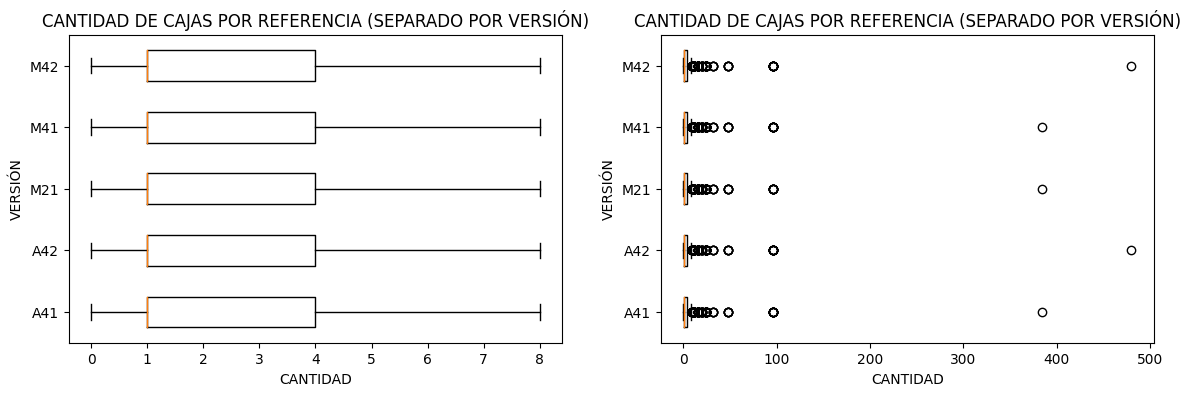

In [ ]:
fig, ax = plt.subplots(figsize=(14,4),nrows=1,ncols=2)
ax[0].boxplot(DSNX_2,vert=False,labels=DSNX_2.columns,showfliers=False) #Asi puedo sacar outliers
ax[0].set_xlabel('CANTIDAD')
ax[0].set_ylabel('VERSIÓN')
ax[0].set_title('CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')
ax[1].boxplot(DSNX_2,vert=False,labels=DSNX_2.columns,showfliers=True)
ax[1].set_xlabel('CANTIDAD')
ax[1].set_ylabel('VERSIÓN')
ax[1].set_title('CANTIDAD DE CAJAS POR REFERENCIA (SEPARADO POR VERSIÓN)')

Sabemos que las referencias vienen en cajas. Ahora, supongamos que hay en total 100 piezas de la referencia X. La pregunta es, en cuantas cajas vienen distribuídas esas 100 piezas? Abriendo 2 cajas ya cuento con las 100?

Efectivamente vemos que, para la mayoría de las referencias, abriendo entre 1 y 4 cajas ya contamos con el total de piezas de esa referencia. Solo en casos muy puntuales tenemos referencias cuyo total viene en muchas cajas.

Llama la atención que las distribuciones sean tan parecidas versión a versión, calculemos los valores para confirmarlo.

In [ ]:
q1= {clave: None for clave in DSNX_2.columns}
q2= {clave: None for clave in DSNX_2.columns}
q3= {clave: None for clave in DSNX_2.columns}
lim_min = {clave: None for clave in DSNX_2.columns}
lim_max = {clave: None for clave in DSNX_2.columns}

for i in DSNX_2.columns:
  q1[i] = DSNX_2[i].quantile(0.25) #1er cuartil
  q2[i] = DSNX_2[i].quantile(0.50) #Mediana
  q3[i] = DSNX_2[i].quantile(0.75) #3er cuartil
  lim_min[i] = q1[i] - (1.5 * (q3[i] - q1[i])) #Bigote inferior
  lim_max[i] = q3[i] + (1.5 * (q3[i] - q1[i])) #Bigote superior, cualquier punto más allá de los bigotes son outliers

print('q1:',q1)
print('q2:',q2)
print('q3:',q3)
print('lim_min:',lim_min)
print('lim_max:',lim_max)

q1: {'A41': 1.0, 'A42': 1.0, 'M21': 1.0, 'M41': 1.0, 'M42': 1.0}
q2: {'A41': 1.0, 'A42': 1.0, 'M21': 1.0, 'M41': 1.0, 'M42': 1.0}
q3: {'A41': 4.0, 'A42': 4.0, 'M21': 4.0, 'M41': 4.0, 'M42': 4.0}
lim_min: {'A41': -3.5, 'A42': -3.5, 'M21': -3.5, 'M41': -3.5, 'M42': -3.5}
lim_max: {'A41': 8.5, 'A42': 8.5, 'M21': 8.5, 'M41': 8.5, 'M42': 8.5}


Efectivamente las distribuciones son iguales. Procedamos a realizar un gráfico distinto para intentar explicarlo.

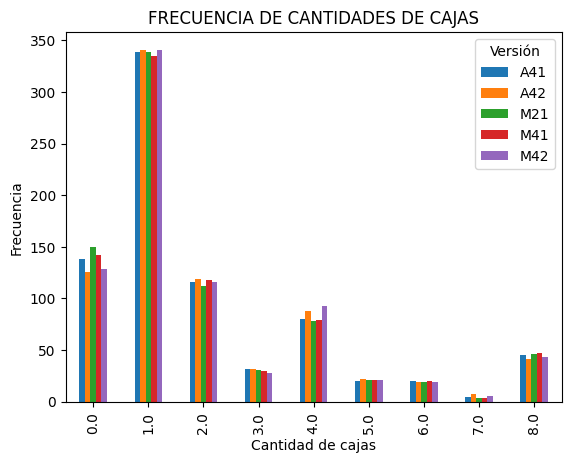

In [ ]:
value_counts = DSNX_2.apply(pd.value_counts)
value_counts = value_counts.loc[0:8]
value_counts.plot(kind='bar')
plt.xlabel('Cantidad de cajas')
plt.ylabel('Frecuencia')
plt.title('FRECUENCIA DE CANTIDADES DE CAJAS')
plt.legend(title='Versión')
plt.show()

Observamos que hay pequeñas diferencias entre las versiones, pero son tan mínimas que, a la hora de calcular las distribuciones, los cuartiles terminan siendo los mismos.

Esto significa que, cuando cambio de una versión a otra, las referencias que dejo de usar terminan siendo compensadas con las nuevas que comienzo a usar.

Supongamos que la versión A41 usa las referencias A, B y C. Al cambiar a la versión A42, dejo de usar la referencia B y comienzo a usar a D. La distribución no cambiará mucho, ya que D termina "compensando" a B.



### Graficamos cuantas cajas vienen por base, diferenciando por versión y si la base es inspeccionable o no.

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_3 = DSNX.drop_duplicates(subset=['VERSION', 'BASE']) #Quiero saber cuantas bases de cada tipo tengo por versión
DSNX_3 = DSNX_3.reset_index(drop=True)
DSNX_3

,CLASE,VERSION,CONTENEDOR,BASE,TIPO BASE,LARGO BASE,ANCHO BASE,ALTURA BASE,PESO BASE,CAJA,...,REFERENCIA,UNID/CAJA,CAJAS/BASE,REFS/BASE,CLASES/BASE,INSPECCIÓN,REFS/CAJA,VOLUMEN CAJA,VOL TOTAL,TIPO PALLET
0,F1,M42,CMAU4908460,AF0001,IRON FRAME,2110,600,1200,205.0,AF0001,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
1,F1,M42,CMAU4908460,AF0002,IRON FRAME,2110,600,1200,205.0,AF0002,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
2,F1,M42,CMAU4908460,AF0003,IRON FRAME,2110,600,1200,205.0,AF0003,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
3,F1,M42,CMAU4908460,AF0004,IRON FRAME,2110,600,1200,205.0,AF0004,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
4,F1,M42,CMAU4908460,AF0005,IRON FRAME,2110,600,1200,205.0,AF0005,...,2804110-BU01,16,1,1,1,0,1,0.0221,0.1326,DIRECTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,G,A42,TCKU7272146,HF026,IRON FRAME,2110,600,1200,286.0,HC0065,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
2321,G,A42,TEMU8886138,HF027,IRON FRAME,2110,600,1200,286.0,HC0049,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
2322,G,A42,TEMU8886138,HF028,IRON FRAME,2110,600,1200,286.0,HC0033,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO
2323,G,A42,TEMU8886138,HF029,IRON FRAME,2110,600,1200,286.0,HC0017,...,3101010-BU51-AA,1,16,1,1,0,1,0.0625,30.0000,DIRECTO


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='CAJA') | (DSNX_IND['COLUMNA']=='BASE') | (DSNX_IND['COLUMNA']=='VERSION') | (DSNX_IND['COLUMNA']=='INSPECCIÓN')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
3,BASE,Base en la cual viene esta pieza,AF0001,MP001
9,CAJA,Caja en la cual viene esta pieza,AF0001,MC0072
19,INSPECCIÓN,Indica si el pallet se deberá inspeccionar o no,0,1


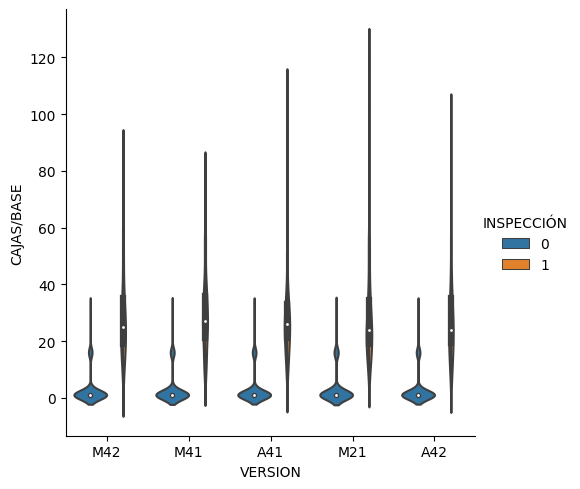

In [ ]:
sns.catplot(data=DSNX_3,kind='violin',y='CAJAS/BASE',x='VERSION',hue='INSPECCIÓN',split=False)

Aquí se pueden sacar varias conclusiones importantes:

1) Sabemos que entre más cajas tenga una base, más referencias distintas va a tener, ya que vimos que las referencias vienen generalmente en 1-4 cajas.

2) Si tiene más referencias, es más probable que haya más de una clase involucrada, y las bases inspeccionables son justamente aquellas que cumplen dicha condición.

3) Por ende, es natural pensar que las bases no inspeccionables generalmente tendrán pocas cajas, y las inspeccionables al contrario.

4) A pesar de esto, tenemos excepciones de bases no inspeccionables con muchas cajas, esto también coincide con el análisis de los gráficos anteriores, ya que habían referencias que excepcionalmente venían en muchas cajas.

5) Vemos que en este caso, las distribuciones versión a versión son parecidas, aunque no iguales. Analicemos mejor este punto.

In [ ]:
DSNX.groupby('VERSION')['CONTENEDOR'].nunique() #Cuantos contenedores tengo por versión?

VERSION
A41    35
A42    35
M21    35
M41    35
M42    35
Name: CONTENEDOR, dtype: int64

Hemos visto que la distribución de cantidad de cajas por referencia apenas varía versión a versión. A su vez, vemos que la cantidad de contenedores tampoco varía.

Por ende, si los contenedores no varían en cantidad, y las cajas por referencia tampoco, es lógico que las cajas por base tengan distribuciones muy similares.

### Graficamos cuantas referencias coinciden por versión.

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
DSNX_4 = DSNX.groupby(['REFERENCIA', 'VERSION'])['REFERENCIA'].nunique().unstack() #Con esto veo en que versión se usa cada referencia
DSNX_4 = DSNX_4.fillna(0)
DSNX_4['INDEX'] = DSNX_4.index
A41 = DSNX_4[DSNX_4.iloc[:, 0] == 1].iloc[:, 5]
A42 = DSNX_4[DSNX_4.iloc[:, 1] == 1].iloc[:, 5]
M21 = DSNX_4[DSNX_4.iloc[:, 2] == 1].iloc[:, 5]
M41 = DSNX_4[DSNX_4.iloc[:, 3] == 1].iloc[:, 5]
M42 = DSNX_4[DSNX_4.iloc[:, 4] == 1].iloc[:, 5]
DSNX_4

VERSION,A41,A42,M21,M41,M42,INDEX
REFERENCIA,,,,,,
09103-06002,1.0,1.0,1.0,1.0,1.0,09103-06002
09103-06005,1.0,1.0,1.0,1.0,1.0,09103-06005
09103-06006,1.0,1.0,1.0,1.0,1.0,09103-06006
09103-06006-S111,1.0,1.0,1.0,1.0,1.0,09103-06006-S111
09103-06007,1.0,1.0,1.0,1.0,1.0,09103-06007
...,...,...,...,...,...,...
GB/T3900-97,1.0,1.0,1.0,1.0,1.0,GB/T3900-97
Q2734816F31,1.0,1.0,1.0,1.0,1.0,Q2734816F31
Q4400412,1.0,1.0,1.0,1.0,1.0,Q4400412


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='VERSION')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
15,REFERENCIA,Código de esta pieza,2804110-BU01,6900006P201D


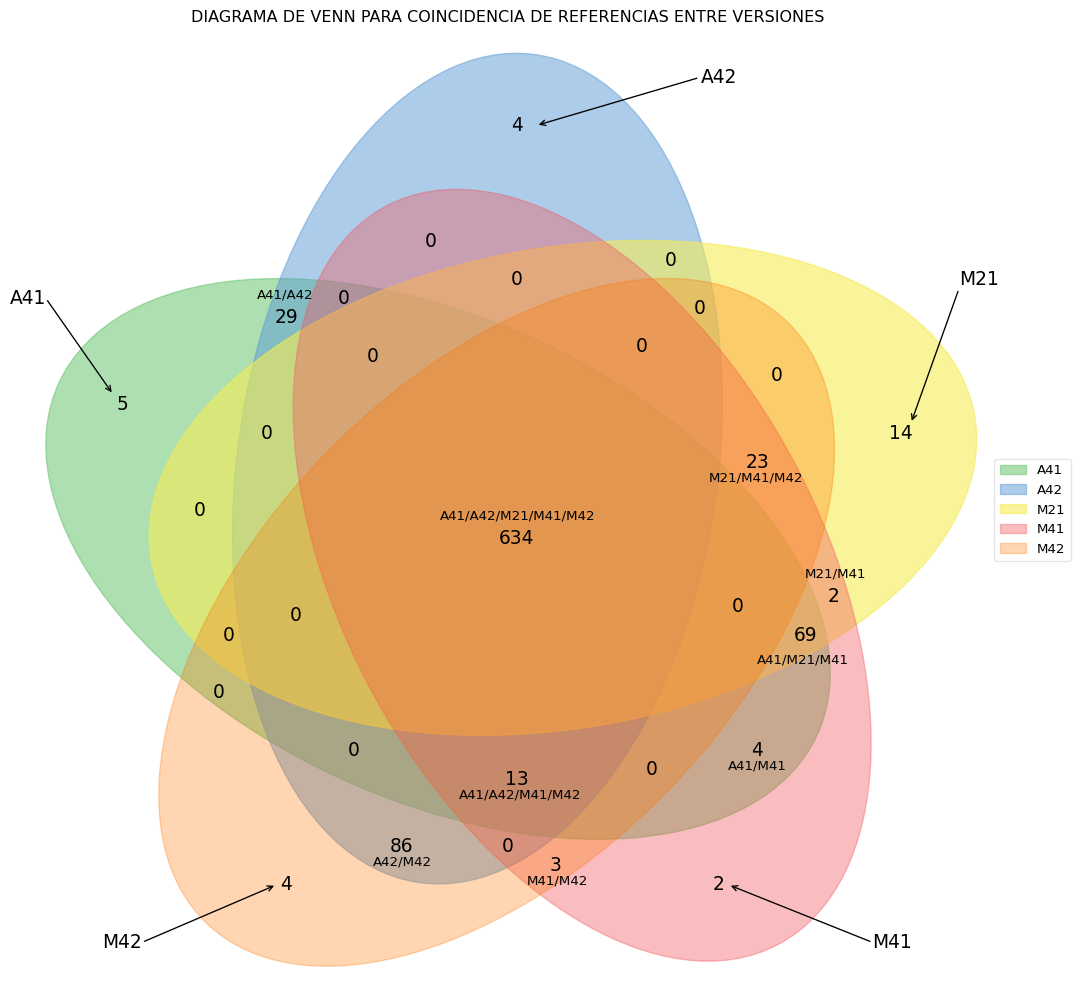

In [ ]:
labels = venn.get_labels([A41, A42, M21, M41, M42], fill=['number'])
fig, ax = venn.venn5(labels, names=['A41', 'A42', 'M21', 'M41', 'M42'])
ax.set_title('DIAGRAMA DE VENN PARA COINCIDENCIA DE REFERENCIAS ENTRE VERSIONES')

ax.annotate('A41/A42', xy=(0.24, 0.72), xytext=(0.24, 0.72))
ax.annotate('M21/M41/M42', xy=(0.71, 0.53), xytext=(0.71, 0.53))
ax.annotate('A41/M21/M41', xy=(0.76, 0.34), xytext=(0.76, 0.34))
ax.annotate('M21/M41', xy=(0.81, 0.43), xytext=(0.81, 0.43))
ax.annotate('A41/M41', xy=(0.73, 0.23), xytext=(0.73, 0.23))
ax.annotate('A41/A42/M41/M42', xy=(0.45, 0.20), xytext=(0.45, 0.20))
ax.annotate('A42/M42', xy=(0.36, 0.13), xytext=(0.36, 0.13))
ax.annotate('M41/M42', xy=(0.52, 0.11), xytext=(0.52, 0.11))
ax.annotate('A41/A42/M21/M41/M42', xy=(0.43, 0.49), xytext=(0.43, 0.49))
plt.annotate('', xy=(0.26, 0.11), xytext=(0.12, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.73, 0.11), xytext=(0.88, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.09, 0.62), xytext=(0.02, 0.72), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.92, 0.59), xytext=(0.97, 0.73), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('', xy=(0.53, 0.90), xytext=(0.70, 0.95), arrowprops=dict(facecolor='black', arrowstyle='->'))
fig.show()

Se generan 5 conjuntos, cada uno correspondiente a una versión. Lo que se ilustra en este gráfico es la cantidad de referencias que coinciden entre estas versiones.

Como se puede ver, tenemos 634 referencias comunes a las 5 versiones (71%), y luego distintas cantidades para cada combinación posible.

Esto sucede porque el producto tiene 3 funcionalidades (X-Y-Z):

X. Puede ser A o M.

Y. Puede ser 4 o 2.

Z. Puede ser 2 o 1.

Por ejemplo, la zona A42/M42 contiene 86. Esto significa que hay 86 referencias que solo utilizan estas dos versiones (por ser las únicas dos con las funcionalidades Y=4 y Z=2 a la vez).

Por otro lado, la zona A41/A42 contiene 29. En este caso hay 29 referencias que solo utilizan estas dos versiones (por ser las únicas dos con las funcionalidades X=A y Y=4) a la vez.

Los modelos A42/M21 no tienen nada en común, no comparten referencias en ningún cruce, salvo en el central que son las referencias comunes a todas las versiones. Profundizaremos en estos temas más adelante.

### Graficamos cuantos pallets de cada tipo pertenecen a cada clase, promediando por versión.

A continuación el análisis, un pequeño glosario y un par de gráficos.

In [ ]:
DSNX_5 = DSNX.pivot_table(index=['VERSION','CLASE'], columns='TIPO PALLET', values='VOLUMEN CAJA', aggfunc='sum') #Calculo el volumen total por clase, por versión
DSNX_5 = DSNX_5.fillna(0)
DSNX_5 = DSNX_5.groupby('CLASE').mean() #Promedio las versiones
DSNX_5 = DSNX_5/VOL_PALLET
DSNX_5 = DSNX_5.apply(np.ceil) #Redondeo para arriba
DSNX_5

TIPO PALLET,DEDICADO,DIRECTO,MIXTO
CLASE,,,
A,0.0,0.0,1.0
CA1,4.0,0.0,7.0
CA2,4.0,0.0,5.0
CA3,4.0,0.0,7.0
CA4,3.0,0.0,9.0
CA5,7.0,0.0,6.0
CA6,27.0,0.0,5.0
CA7,11.0,0.0,7.0
CH1,12.0,200.0,2.0


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='CLASE') | (DSNX_IND['COLUMNA']=='CANT PALLETS') | (DSNX_IND['COLUMNA']=='TIPO PALLET') | (DSNX_IND['COLUMNA']=='VERSION') | (DSNX_IND['COLUMNA']=='VOL TOTAL')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
0,CLASE,Sector en el cual se ensambla esta pieza,F1,A
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
22,VOL TOTAL,Vol. que ocupa esta referencia en su clase,0.1356,0.156
23,CANT PALLETS,Cantidad de pallets que representa el VOL TOTAL,1,3
24,TIPO PALLET,"Indica pallet dedicado, mixto o directo",DIRECTO,DEDICADO


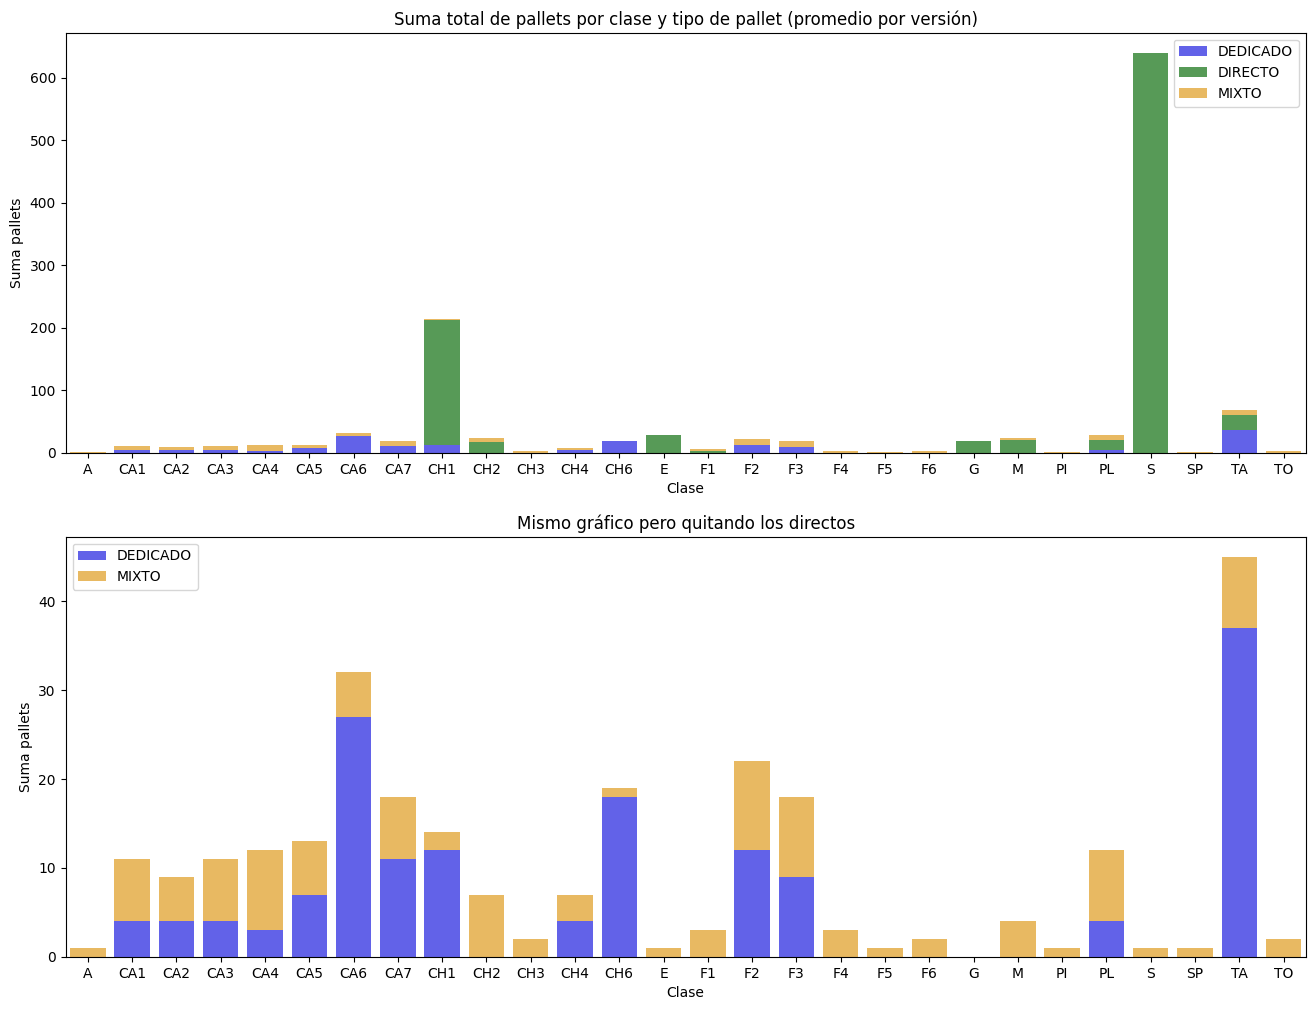

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DEDICADO', color='blue', label='DEDICADO', alpha=0.7, ax=ax1)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DIRECTO', color='green', label='DIRECTO', alpha=0.7, bottom=DSNX_5['DEDICADO'], ax=ax1)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='MIXTO', color='orange', label='MIXTO', alpha=0.7, bottom=DSNX_5['DEDICADO'] + DSNX_5['DIRECTO'], ax=ax1)

sns.barplot(data=DSNX_5, x=DSNX_5.index, y='DEDICADO', color='blue', label='DEDICADO', alpha=0.7, ax=ax2)
sns.barplot(data=DSNX_5, x=DSNX_5.index, y='MIXTO', color='orange', label='MIXTO', alpha=0.7, bottom=DSNX_5['DEDICADO'], ax=ax2)

ax1.set_title('Suma total de pallets por clase y tipo de pallet (promedio por versión)')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Suma pallets')
ax1.legend()

ax2.set_title('Mismo gráfico pero quitando los directos')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Suma pallets')
ax2.legend()

Las clases "S" y "CH1" conllevan gran cantidad de pallets directos, esto sucede porque suelen estar compuestos por referencias que conllevan gran volumen, son piezas estructurales del producto.

Luego repetimos el mismo gráfico pero quitando los directos, para que se aprecie mejor la distribución entre dedicados y mixtos. Ya en este gráfico se empieza a dejar ver cuales son las clases que requerirán más espacio de almacenamiento.

### Graficamos un mapa de calor para ver la diferencia entre versiones.

A continuación el análisis, un pequeño glosario y el gráfico.

In [ ]:
#El objetivo aqui fue generar una matriz con la versión como índice y como columna, para poder ver la diferencia de piezas de versión a versión
DSNX_6 = pd.DataFrame(index=DSNX_4.columns[:5], columns=DSNX_4.columns[:5])
total=0
for k in DSNX_4.columns[:5]:
  for j in DSNX_4.columns[:5]:
    for i in DSNX_4.index:
      if DSNX_4.loc[i,j]!=DSNX_4.loc[i,k]:
        total+=1 #Voy recorriendo el DSNX_4 para cada par de versiones, si las dos valen 1 o 0, significa que ambas usan (o no) la referencia. Por ello solo sumo uno si los valores difieren
    DSNX_6.loc[k,j]=total
    total=0
DSNX_6 = DSNX_6.astype(float)
DSNX_6

VERSION,A41,A42,M21,M41,M42
VERSION,,,,,
A41,0.0,168.0,90.0,64.0,223.0
A42,168.0,0.0,240.0,222.0,63.0
M21,90.0,240.0,0.0,36.0,191.0
M41,64.0,222.0,36.0,0.0,167.0
M42,223.0,63.0,191.0,167.0,0.0


In [ ]:
DSNX_IND[(DSNX_IND['COLUMNA']=='REFERENCIA') | (DSNX_IND['COLUMNA']=='VERSION')]

,COLUMNA,DESCRIPCIÓN,EJEMPLO 1,EJEMPLO 2
1,VERSION,Versión del producto al cual pertenece esta pieza,M42,A42
15,REFERENCIA,Código de esta pieza,2804110-BU01,6900006P201D


Text(0.5, 1.0, 'DIFERENCIA DE USO DE REFERENCIAS ENTRE VERSIONES')

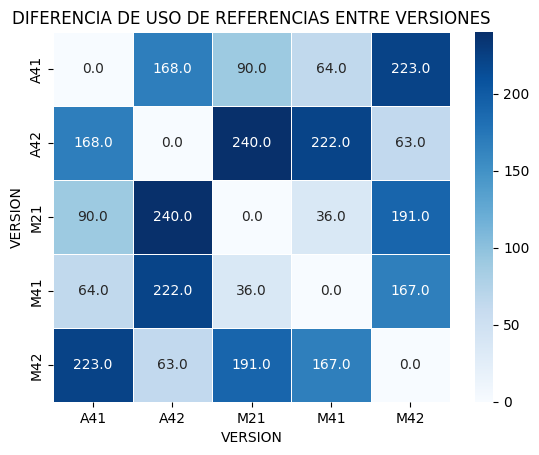

In [ ]:
sns.heatmap(DSNX_6,annot=True,fmt=".1f",linewidth=.5,cmap="Blues")
plt.title('DIFERENCIA DE USO DE REFERENCIAS ENTRE VERSIONES')

Obviamente la diagonal valdrá 0 ya que sería una comparación entre la misma versión, luego vemos que la que tiene más diferencias es la M21 con la A42.

Como se expicó anteriormente, esto tiene sentido ya que cada versión consta de 3 funciones. Las versiones A41 y A42 difieren solo en una función, mientras que las M21 y A42 difieren en las tres funciones (por ello son las que más difieren en las referencias que usan).

### Conclusiones hasta ahora:

1)	Las clases contienen más o menos la misma cantidad de referencias distintas. Solo la clase “TO” sobresale.

2)	La mayoría de las referencias vienen en su totalidad en 1-4 cajas. Solo algunas puntuales vienen en más cantidad.

3)	El punto anterior no varía versión a versión, las distribuciones son iguales.

4)	Las bases no inspeccionables traen pocas cajas, salvo excepciones. Las inspeccionables, lo opuesto.

5)	El punto anterior prácticamente no varía versión a versión.

6)	La cantidad de contenedores por versión es la misma.

7)	El 71% de las referencias son comunes a todas las versiones, el 29% restante son las que se usan dependiendo de las funcionalidades X-Y-Z.

9)	Las clases “S” y “CH1” son las que más pallets directos llevan.

10)	Entre más funcionalidades compartan dos versiones, más piezas en común tendrán.


## Exploratory data analysis (Parte 2)

En esta etapa del proyecto analizaremos el packaging de las cajas.

Muchas veces sucede que, debido a roturas, logística tenga que pedir puntualmente al proveedor cajas con piezas para realizar reemplazos.

En virtud de esto, es de interés saber si es posible predecir que tipo de packaging enviará el proveedor, en función del contenido que tendrá la caja (o sea en función del pedido de piezas a reponer).

Tener esta información ayudaría a preparar de manera anticipada, las condiciones de almacenamiento necesarias para dicho arribo de producto.

In [ ]:
DSNX_7 = DSNX[['VERSION','CAJA','PESO CAJA','VOLUMEN CAJA','UNID/CAJA','REFS/CAJA','TIPO CAJA']] #Me quedo con las columnas que me interesan del DS original.
DSNX_7

,VERSION,CAJA,PESO CAJA,VOLUMEN CAJA,UNID/CAJA,REFS/CAJA,TIPO CAJA
0,M42,AF0001,153.92,0.0221,16,1,IRON FRAME
1,M42,AF0002,153.92,0.0221,16,1,IRON FRAME
2,M42,AF0003,153.92,0.0221,16,1,IRON FRAME
3,M42,AF0004,153.92,0.0221,16,1,IRON FRAME
4,M42,AF0005,153.92,0.0221,16,1,IRON FRAME
...,...,...,...,...,...,...,...
23096,A42,HC0012,15.05,0.0625,1,1,CARTON
23097,A42,HC0013,15.05,0.0625,1,1,CARTON
23098,A42,HC0014,15.05,0.0625,1,1,CARTON
23099,A42,HC0015,15.05,0.0625,1,1,CARTON


Cabe destacar que en el DS tengo cajas repetidas. Esto sucede porque algunas de ellas traen más de una referencia dentro, y esta información se subdivide en varias filas, veamos un ejemplo.

In [ ]:
DSNX[(DSNX['CAJA']=='AC1077') & (DSNX['VERSION']=='M42')]

,CLASE,VERSION,CONTENEDOR,BASE,TIPO BASE,LARGO BASE,ANCHO BASE,ALTURA BASE,PESO BASE,CAJA,...,REFERENCIA,UNID/CAJA,CAJAS/BASE,REFS/BASE,CLASES/BASE,INSPECCIÓN,REFS/CAJA,VOLUMEN CAJA,VOL TOTAL,TIPO PALLET
489,F5,M42,CMAU8944850,AF0091,IRON FRAME,1700,650,1250,639.21,AC1077,...,3918910-BU01,24,39,10,6,1,3,0.0192,0.0768,MIXTO
490,F5,M42,CMAU8944850,AF0091,IRON FRAME,1700,650,1250,639.21,AC1077,...,3918911-BU01,24,39,10,6,1,3,0.0192,0.0768,MIXTO
491,F5,M42,CMAU8944850,AF0091,IRON FRAME,1700,650,1250,639.21,AC1077,...,3918922-BU01,24,39,10,6,1,3,0.0192,0.0768,MIXTO


En el ejemplo anterior, tenemos 3 referencias en la caja AF0091. En la columna REFS/CAJA vemos el valor 3, y en la columna UNID/CAJA indica que hay 24 de cada una dentro.

Por este motivo, haremos un cálculo para determinar realmente el número de unidades por caja, que en este ejemplo sería 24*3=72.

In [ ]:
DSNX_7['UNID/CAJA'] = DSNX_7.groupby(['VERSION','CAJA'])['UNID/CAJA'].transform('sum') #Agrupo por caja y sumo unidades
DSNX_7

<ipython-input-55-1ae2873eaf32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DSNX_7['UNID/CAJA'] = DSNX_7.groupby(['VERSION','CAJA'])['UNID/CAJA'].transform('sum') #Agrupo por caja y sumo unidades


,VERSION,CAJA,PESO CAJA,VOLUMEN CAJA,UNID/CAJA,REFS/CAJA,TIPO CAJA
0,M42,AF0001,153.92,0.0221,16,1,IRON FRAME
1,M42,AF0002,153.92,0.0221,16,1,IRON FRAME
2,M42,AF0003,153.92,0.0221,16,1,IRON FRAME
3,M42,AF0004,153.92,0.0221,16,1,IRON FRAME
4,M42,AF0005,153.92,0.0221,16,1,IRON FRAME
...,...,...,...,...,...,...,...
23096,A42,HC0012,15.05,0.0625,1,1,CARTON
23097,A42,HC0013,15.05,0.0625,1,1,CARTON
23098,A42,HC0014,15.05,0.0625,1,1,CARTON
23099,A42,HC0015,15.05,0.0625,1,1,CARTON


In [ ]:
DSNX_7 = DSNX_7.drop_duplicates(subset=['VERSION', 'CAJA']) #Borro cajas duplicadas
DSNX_7 = DSNX_7.reset_index(drop=True)
DSNX_7

,VERSION,CAJA,PESO CAJA,VOLUMEN CAJA,UNID/CAJA,REFS/CAJA,TIPO CAJA
0,M42,AF0001,153.92,0.0221,16,1,IRON FRAME
1,M42,AF0002,153.92,0.0221,16,1,IRON FRAME
2,M42,AF0003,153.92,0.0221,16,1,IRON FRAME
3,M42,AF0004,153.92,0.0221,16,1,IRON FRAME
4,M42,AF0005,153.92,0.0221,16,1,IRON FRAME
...,...,...,...,...,...,...,...
21774,A42,HC0012,15.05,0.0625,1,1,CARTON
21775,A42,HC0013,15.05,0.0625,1,1,CARTON
21776,A42,HC0014,15.05,0.0625,1,1,CARTON
21777,A42,HC0015,15.05,0.0625,1,1,CARTON


In [ ]:
DSNX_7[(DSNX_7['CAJA']=='AC1077') & (DSNX_7['VERSION']=='M42')] #Chequeo que quedó ok, como comenté antes, el valor correcto debería ser 72 unid/caja y 3 ref/caja

,VERSION,CAJA,PESO CAJA,VOLUMEN CAJA,UNID/CAJA,REFS/CAJA,TIPO CAJA
489,M42,AC1077,19.97,0.0192,72,3,CARTON


In [ ]:
reemplazos = {'BUBBLE FILM': 1, 'CARTON': 2, 'IRON FRAME': 3, 'IRON TRAY': 4, 'WOOD FRAME':5} #Reemplazo los strings por números para comenzar a trabajar
DSNX_7['TIPO CAJA'] = DSNX_7['TIPO CAJA'].replace(reemplazos)
DSNX_7

,VERSION,CAJA,PESO CAJA,VOLUMEN CAJA,UNID/CAJA,REFS/CAJA,TIPO CAJA
0,M42,AF0001,153.92,0.0221,16,1,3
1,M42,AF0002,153.92,0.0221,16,1,3
2,M42,AF0003,153.92,0.0221,16,1,3
3,M42,AF0004,153.92,0.0221,16,1,3
4,M42,AF0005,153.92,0.0221,16,1,3
...,...,...,...,...,...,...,...
21774,A42,HC0012,15.05,0.0625,1,1,2
21775,A42,HC0013,15.05,0.0625,1,1,2
21776,A42,HC0014,15.05,0.0625,1,1,2
21777,A42,HC0015,15.05,0.0625,1,1,2


In [ ]:
pca_obj = PCA() #Aplico PCA
PCA_DF = pd.DataFrame(pca_obj.fit_transform(DSNX_7.iloc[:,2:6]))
PCA_DF

,0,1,2,3
0,-33.448624,121.595201,1.910807,-0.105481
1,-33.448624,121.595201,1.910807,-0.105481
2,-33.448624,121.595201,1.910807,-0.105481
3,-33.448624,121.595201,1.910807,-0.105481
4,-33.448624,121.595201,1.910807,-0.105481
...,...,...,...,...
21774,-47.884310,-17.323971,0.193862,-0.032460
21775,-47.884310,-17.323971,0.193862,-0.032460
21776,-47.884310,-17.323971,0.193862,-0.032460
21777,-47.884310,-17.323971,0.193862,-0.032460


In [ ]:
pca_obj.explained_variance_ratio_ #Veo que con las dos primeras columnas me quedo aproximadamente con el 100% de la info.

array([9.16901379e-01, 8.30897955e-02, 8.02028222e-06, 8.04837781e-07])

In [ ]:
PCA_DF = PCA_DF.drop(2, axis=1) #Elimino columna 2
PCA_DF = PCA_DF.drop(3, axis=1) #Elimino columna 3
PCA_DF['Y'] = DSNX_7['TIPO CAJA'] #Agrego el packaging real de la caja junto a las columnas 0 y 1
PCA_DF

,0,1,Y
0,-33.448624,121.595201,3
1,-33.448624,121.595201,3
2,-33.448624,121.595201,3
3,-33.448624,121.595201,3
4,-33.448624,121.595201,3
...,...,...,...
21774,-47.884310,-17.323971,2
21775,-47.884310,-17.323971,2
21776,-47.884310,-17.323971,2
21777,-47.884310,-17.323971,2


In [ ]:
train_df, test_df = train_test_split(PCA_DF, test_size=0.3, random_state=42) #Divido el DS en una parte para entrenar y otra para testeo
print('Dimensiones matriz de entrenamiento:',train_df.shape)
print('Dimensiones matriz de testeo:',test_df.shape)

Dimensiones matriz de entrenamiento: (15245, 3)
Dimensiones matriz de testeo: (6534, 3)


In [ ]:
modelo_arbol = DecisionTreeClassifier() #Entreno
modelo_arbol.fit(train_df.iloc[:,:2],train_df.iloc[:,2])

DecisionTreeClassifier()

In [ ]:
test_df['PREDICT']=modelo_arbol.predict(test_df.iloc[:,:2]) #Testeo
#DSNX_7.to_excel('PREDICTO.xlsx', index=False)
test_df

,0,1,Y,PREDICT
4977,-47.865735,-21.894194,2,2
7125,-0.892098,-15.313434,2,2
2533,1.161340,-28.463389,2,2
14439,-36.855980,-24.277419,2,2
19756,-46.870669,-20.519687,2,2
...,...,...,...,...
3613,-24.896393,-14.308675,2,2
1455,-47.854532,-24.659912,2,2
17573,11.068193,-5.515780,2,2
17131,-47.884310,-17.323971,2,2


In [ ]:
confusion = pd.DataFrame(index=['TP','FP','TN','FN'], columns=range(1,6)) #Armo una matriz para colocar los valores de la matriz de confusión por tipo de packaging
confusion[:] = 0
for j,k in zip(test_df['Y'],test_df['PREDICT']): #Voy iterando con los valores de la columna del dato real y la predicha
  if j==k:
    for i in confusion.columns:
      if i==j:
        confusion.loc['TP',i] += 1
      else:
        confusion.loc['TN',i] += 1
  else:
    for i in confusion.columns:
      if i==j:
        confusion.loc['FN',i] += 1
      elif i==k:
        confusion.loc['FP',i] += 1
      else:
        confusion.loc['TN',i] += 1
confusion #Printeo la matriz de confusión para ver como le fue al modelo

,1,2,3,4,5
TP,285,5705,444,10,78
FP,1,7,3,1,0
TN,6241,819,6087,6522,6455
FN,7,3,0,1,1


Text(0.5, 1.0, 'MATRIZ DE CONFUSIÓN')

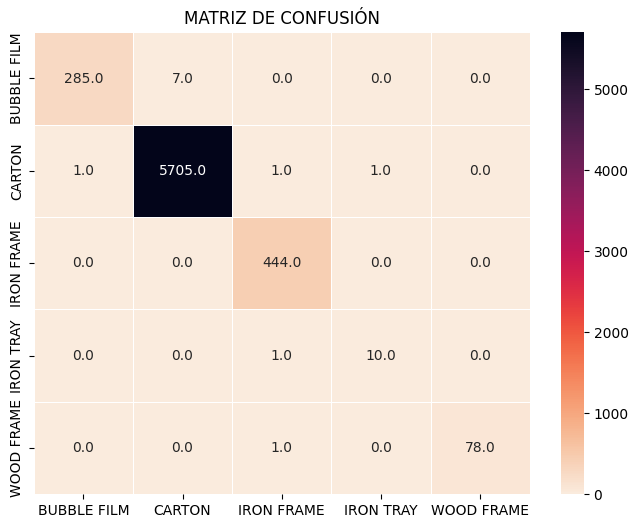

In [ ]:
cm = confusion_matrix(test_df['Y'],test_df['PREDICT'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".1f", linewidth=.5, cmap="rocket_r", xticklabels=reemplazos.keys(), yticklabels=reemplazos.keys())
plt.title('MATRIZ DE CONFUSIÓN') #Genero la matriz de confusión de manera gráfica

Vemos que en general el modelo acierta el tipo de packaging, ya que la diagonal es la zona que tiene más cantidad de datos.

Igualmente calculemos las métricas, para estar seguros de que realmente funciona.

In [ ]:
metricas = pd.DataFrame(index=['Precision','Recall','Accuracy','Specificity','F1'], columns=range(1,6)) #Creo una matriz para almacenar las métricas por tipo de packaging
for i in metricas.columns:
  metricas.loc['Precision',i] = confusion.loc['TP',i] / (confusion.loc['TP',i] + confusion.loc['FP',i])
  metricas.loc['Recall',i] = confusion.loc['TP',i] / (confusion.loc['TP',i] + confusion.loc['FN',i])
  metricas.loc['Accuracy',i] = (confusion.loc['TP',i] + confusion.loc['TN',i]) / confusion[i].sum()
  metricas.loc['Specificity',i] = confusion.loc['TN',i] / (confusion.loc['TN',i] + confusion.loc['FP',i])
  metricas.loc['F1',i] = 2 * metricas.loc['Recall',i] * metricas.loc['Precision',i] / (metricas.loc['Recall',i] + metricas.loc['Precision',i])
metricas.columns = reemplazos.keys()
metricas['Promedio'] = metricas.mean(axis=1)
metricas #Printeo la matriz completa

,BUBBLE FILM,CARTON,IRON FRAME,IRON TRAY,WOOD FRAME,Promedio
Precision,0.996503,0.998775,0.993289,0.909091,1.0,0.979532
Recall,0.976027,0.999474,1.0,0.909091,0.987342,0.974387
Accuracy,0.998776,0.99847,0.999541,0.999694,0.999847,0.999265
Specificity,0.99984,0.991525,0.999507,0.999847,1.0,0.998144
F1,0.986159,0.999124,0.996633,0.909091,0.993631,0.976928


Así serían los resultados de las métricas calculados individualmente, calculemos ahora métricas más generales utilizando la librería.

In [ ]:
metricas.loc['Precision','Sklearn Metrics'] = precision_score(test_df['Y'],test_df['PREDICT'],average='macro')
metricas.loc['Recall','Sklearn Metrics'] = recall_score(test_df['Y'],test_df['PREDICT'],average='macro')
metricas.loc['Accuracy','Sklearn Metrics'] = accuracy_score(test_df['Y'],test_df['PREDICT'])
metricas.loc['Specificity','Sklearn Metrics'] = 'S/D'
metricas.loc['F1','Sklearn Metrics'] = f1_score(test_df['Y'],test_df['PREDICT'],average='macro')
metricas

,BUBBLE FILM,CARTON,IRON FRAME,IRON TRAY,WOOD FRAME,Promedio,Sklearn Metrics
Precision,0.996503,0.998775,0.993289,0.909091,1.0,0.979532,0.979532
Recall,0.976027,0.999474,1.0,0.909091,0.987342,0.974387,0.974387
Accuracy,0.998776,0.99847,0.999541,0.999694,0.999847,0.999265,0.998163
Specificity,0.99984,0.991525,0.999507,0.999847,1.0,0.998144,S/D
F1,0.986159,0.999124,0.996633,0.909091,0.993631,0.976928,0.976928


Como la librería no nos da la posibilidad de calcular la Specificity, nos queda vacío ese dato.

En cuanto al resto, los resultados práctiamente no varían.

### Conclusiones hasta ahora:

El modelo realmente funciona muy bien, las métricas dieron estupendo. Podemos concluir entonces que, sabiendo el peso, volumen y cantidad de cada referencia que haya que pedir para reponer, podremos predecir de forma muy buena en qué tipo de packaging vendrá la mercadería.